In [2]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import os.path
import geopandas as gpd


# Getting packages that we need from sklearn

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [3]:
# Reading in the Data and checking it to ensure it's output is correct

socCap_df = pd.read_csv("social_capital_zip.csv")

# Setting index to zip for future use in Phase 2

socCap_df.set_index('zip', inplace=True)

# Looking at the DF 

socCap_df

,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,nbhd_ec_high_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
zip,,,,,,,,,,,,,,,,,,,,,
1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,1.82494,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.105720,0.945260,0.05650,0.010800
1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,1.49574,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.103400,0.901630,0.14951,0.036880
1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,NaN,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.136500,0.769240,0.10501,0.080500
1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,1.63082,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.105540,0.958370,0.15862,0.021630
1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,1.49310,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.103910,0.948730,0.13053,0.016900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,1.15563,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.134730,0.997200,0.11883,0.029990
99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,0.93392,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.155610,0.997520,0.08404,0.032150
99925,2198.0,154.513840,927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.146579,0.992298,0.12396,0.027728


In [4]:
# Dropping NA Values in the dataframe such that we have points that exist to do our analysis on.

socCap_df = socCap_df.dropna()
socCap_df

,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,nbhd_ec_high_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
zip,,,,,,,,,,,,,,,,,,,,,
1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,1.82494,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080
1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,1.49574,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688
1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,1.63082,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163
1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,1.49310,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690
1013,25013.0,2616.550354,23065,0.69744,0.01274,0.53930,0.75807,1.23152,0.01799,0.94889,...,1.17646,0.67602,0.13700,-0.09613,0.20223,-0.40365,0.08648,0.89057,0.06191,0.00969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99835,2220.0,790.157898,8738,1.14199,0.01983,1.07357,1.14861,1.42479,0.01759,1.30968,...,1.24022,1.12967,0.00953,-0.12930,0.04966,-0.15935,0.11632,0.99593,0.13909,0.03503
99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,1.15563,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.13473,0.99720,0.11883,0.02999
99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,0.93392,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.15561,0.99752,0.08404,0.03215


# Phase 1 - Visualizations:


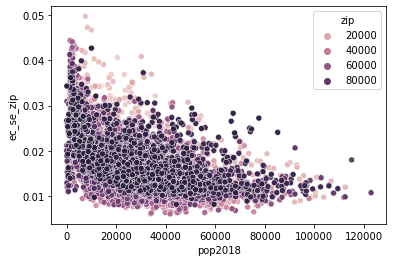

In [20]:
# Plotting Basic Visualizations

plot1 = sns.scatterplot(data = socCap_df, x = "pop2018", y = "ec_se_zip", hue = "zip")

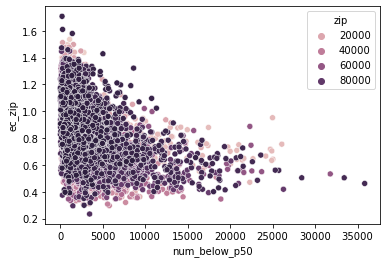

In [21]:
# Plotting Basic Visualizations

plot2 = sns.scatterplot(data = socCap_df, x = "num_below_p50", y = "ec_zip", hue = "zip")

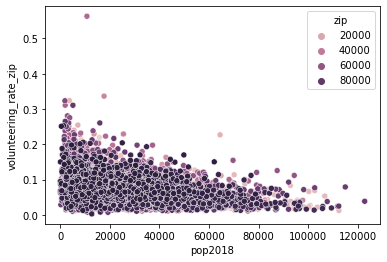

In [23]:
# Plotting Basic Visualizations

plot3 = sns.scatterplot(data = socCap_df, x = "pop2018", y = "volunteering_rate_zip", hue = "zip")

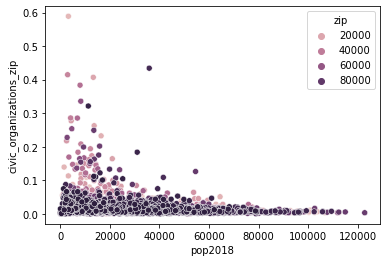

In [24]:
# Plotting Basic Visualizations

plot4 = sns.scatterplot(data = socCap_df, x = "pop2018", y = "civic_organizations_zip", hue = "zip")

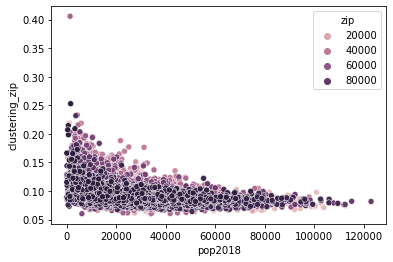

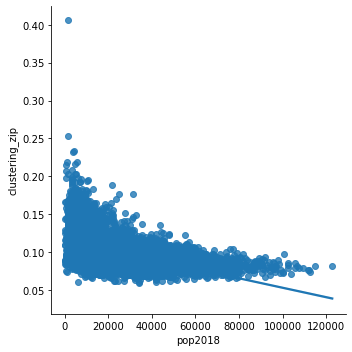

In [6]:
# Plotting Basic Visualizations

plot5 = sns.scatterplot(data = socCap_df, x = "pop2018", y = "clustering_zip", hue = "zip")

## **Talk about the Graphs Here:**

# Phase 2 - Clustering:

In [4]:
# Print out Columns in DF to select the most valuable ones for clustering

for col in socCap_df.columns:
    print(col)

county
num_below_p50
pop2018
ec_zip
ec_se_zip
nbhd_ec_zip
ec_grp_mem_zip
ec_high_zip
ec_high_se_zip
nbhd_ec_high_zip
ec_grp_mem_high_zip
exposure_grp_mem_zip
exposure_grp_mem_high_zip
nbhd_exposure_zip
bias_grp_mem_zip
bias_grp_mem_high_zip
nbhd_bias_zip
nbhd_bias_high_zip
clustering_zip
support_ratio_zip
volunteering_rate_zip
civic_organizations_zip


In [5]:
# Creating Columns we plan to create clusters on

clust_columns = ["ec_zip", "volunteering_rate_zip", "civic_organizations_zip", "clustering_zip"]

# Selecting our number of clusters

num_clusts = 4

# Selecting the linkage type for our clustering

linkage_type = "complete"

df_cluster = socCap_df[clust_columns].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
agglom = AgglomerativeClustering(n_clusters=num_clusts, linkage=linkage_type).fit(scaled_data)
df_cluster["label"] = agglom.labels_

In [6]:
# Printing out the clusters to display the results

cluster_towns = {}
for index, row in df_cluster.reset_index().iterrows():
    clust = row["label"]
    cluster_towns.setdefault(clust, []).append(row)
    
for cluster, rows in cluster_towns.items():
    rows_tuples = [ tuple(row) for row in rows ]
    for row in sorted(rows_tuples):
        print(row[:7])
    print("\n")

(1001.0, 0.88156998, 0.056499999, 0.0108, 0.10572, 0.0)
(1002.0, 1.18348, 0.14951, 0.036880001, 0.1034, 0.0)
(1005.0, 1.15543, 0.15862, 0.02163, 0.10554, 0.0)
(1007.0, 1.1924, 0.13053, 0.016899999, 0.10391, 0.0)
(1013.0, 0.69744003, 0.06191, 0.0096899997, 0.086479999, 0.0)
(1020.0, 0.72701001, 0.061530001, 0.00078, 0.092639998, 0.0)
(1027.0, 1.1387, 0.16144, 0.025359999, 0.097050004, 0.0)
(1028.0, 0.94024998, 0.06718, 0.01216, 0.10353, 0.0)
(1030.0, 0.98904997, 0.066100001, 0.0074999998, 0.10812, 0.0)
(1033.0, 1.19631, 0.092419997, 0.02317, 0.10157, 0.0)
(1040.0, 0.54841, 0.075099997, 0.0137, 0.083059996, 0.0)
(1056.0, 0.92281997, 0.06515, 0.0085500004, 0.11473, 0.0)
(1060.0, 1.11224, 0.21965, 0.04603, 0.096749999, 0.0)
(1062.0, 1.04111, 0.16169, 0.024420001, 0.096050002, 0.0)
(1069.0, 0.98422998, 0.059969999, 0.00605, 0.10901, 0.0)
(1073.0, 1.2580301, 0.14509, 0.01018, 0.10609, 0.0)
(1075.0, 1.10874, 0.10522, 0.0211, 0.10207, 0.0)
(1082.0, 1.05092, 0.070260003, 0.01071, 0.1037, 0.0)
(

(16301.0, 0.66845, 0.074139997, 0.020099999, 0.11522, 0.0)
(16314.0, 0.85281003, 0.10193, 0.021539999, 0.11251, 0.0)
(16316.0, 0.84399003, 0.073289998, 0.01787, 0.11097, 0.0)
(16323.0, 0.71785003, 0.076449998, 0.021500001, 0.1139, 0.0)
(16335.0, 0.77741998, 0.078129999, 0.02667, 0.10752, 0.0)
(16345.0, 0.88937998, 0.12585001, 0.0228, 0.125, 0.0)
(16346.0, 0.82717001, 0.06222, 0.022539999, 0.11385, 0.0)
(16347.0, 0.74305999, 0.087839998, 0.0090699997, 0.1558, 0.0)
(16354.0, 0.73142999, 0.092320003, 0.021, 0.13123, 0.0)
(16365.0, 0.76050001, 0.080920003, 0.02874, 0.12451, 0.0)
(16371.0, 0.74228001, 0.064719997, 0.03658, 0.12726, 0.0)
(16373.0, 0.86186999, 0.069499999, 0.032120001, 0.12488, 0.0)
(16401.0, 0.79806, 0.060970001, 0.024250001, 0.11433, 0.0)
(16403.0, 0.86839002, 0.069399998, 0.01767, 0.11254, 0.0)
(16407.0, 0.68823999, 0.066160001, 0.01761, 0.1229, 0.0)
(16412.0, 0.97974002, 0.10367, 0.02162, 0.11, 0.0)
(16415.0, 1.01714, 0.069629997, 0.01615, 0.099069998, 0.0)
(16417.0, 0.84

(28080.0, 0.79894, 0.068300001, 0.0084100002, 0.094910003, 0.0)
(28081.0, 0.70068997, 0.044799998, 0.01402, 0.093719997, 0.0)
(28083.0, 0.68340999, 0.041159999, 0.01252, 0.093719997, 0.0)
(28086.0, 0.59306002, 0.036740001, 0.016170001, 0.10122, 0.0)
(28090.0, 0.57256001, 0.046920002, 0.01514, 0.10265, 0.0)
(28092.0, 0.65697998, 0.04544, 0.01856, 0.098739997, 0.0)
(28097.0, 0.91359001, 0.03867, 0.02139, 0.10324, 0.0)
(28103.0, 0.69003999, 0.03466, 0.01681, 0.10938, 0.0)
(28104.0, 0.95020002, 0.061420001, 0.00973, 0.08478, 0.0)
(28105.0, 0.82713997, 0.054359999, 0.02084, 0.088040002, 0.0)
(28107.0, 0.83482999, 0.055179998, 0.0092000002, 0.093620002, 0.0)
(28110.0, 0.71140999, 0.03968, 0.0093799997, 0.099799998, 0.0)
(28112.0, 0.68655002, 0.038520001, 0.02204, 0.10017, 0.0)
(28114.0, 0.55426002, 0.046840001, 0.0099799996, 0.10663, 0.0)
(28115.0, 0.92921001, 0.070799999, 0.01873, 0.09341, 0.0)
(28117.0, 0.92918003, 0.073030002, 0.0090699997, 0.091590002, 0.0)
(28120.0, 0.79159999, 0.051130

(34475.0, 0.47541001, 0.0273, 0.07062, 0.092419997, 0.0)
(34476.0, 0.74760002, 0.053789999, 0.01018, 0.082340002, 0.0)
(34479.0, 0.63292003, 0.050859999, 0.00764, 0.085689999, 0.0)
(34480.0, 0.66434997, 0.042830002, 0.00477, 0.0836, 0.0)
(34482.0, 0.57729, 0.0374, 0.0063399998, 0.088639997, 0.0)
(34491.0, 0.59814, 0.04346, 0.00923, 0.084129997, 0.0)
(34601.0, 0.65030998, 0.055470001, 0.027650001, 0.09217, 0.0)
(34604.0, 0.73180002, 0.067259997, 0.0095699998, 0.079080001, 0.0)
(34606.0, 0.69427001, 0.05632, 0.019269999, 0.085649997, 0.0)
(34608.0, 0.74036998, 0.061009999, 0.0058900001, 0.083760001, 0.0)
(34609.0, 0.78561002, 0.059110001, 0.0051600002, 0.087389998, 0.0)
(34610.0, 0.72802001, 0.06075, 0.01114, 0.080629997, 0.0)
(34613.0, 0.74647999, 0.063780002, 0.01199, 0.084689997, 0.0)
(34614.0, 0.79342997, 0.082060002, 0.0060399999, 0.084919997, 0.0)
(34638.0, 1.03425, 0.060090002, 0.00388, 0.078589998, 0.0)
(34639.0, 0.98857999, 0.066880003, 0.016790001, 0.083679996, 0.0)
(34652.0, 0

(44145.0, 1.11283, 0.079769999, 0.017340001, 0.099880002, 0.0)
(44146.0, 0.63729, 0.03664, 0.01352, 0.089050002, 0.0)
(44147.0, 1.11093, 0.06256, 0.01157, 0.09911, 0.0)
(44149.0, 1.11696, 0.084210001, 0.0061499998, 0.095169999, 0.0)
(44201.0, 0.90947998, 0.090219997, 0.01415, 0.10591, 0.0)
(44202.0, 1.19206, 0.06865, 0.0123, 0.10294, 0.0)
(44203.0, 0.72095001, 0.062980004, 0.01174, 0.10246, 0.0)
(44212.0, 1.03711, 0.074369997, 0.0082200002, 0.096879996, 0.0)
(44216.0, 0.97456998, 0.079949997, 0.0060800002, 0.10191, 0.0)
(44217.0, 0.91529, 0.10412, 0.023119999, 0.10086, 0.0)
(44221.0, 0.88713002, 0.083149999, 0.01299, 0.1059, 0.0)
(44223.0, 0.94362998, 0.079269998, 0.0078699999, 0.10364, 0.0)
(44224.0, 1.00771, 0.081950001, 0.01329, 0.10391, 0.0)
(44230.0, 0.98505998, 0.084480003, 0.0162, 0.10582, 0.0)
(44231.0, 0.87469, 0.095080003, 0.02238, 0.1115, 0.0)
(44236.0, 1.18378, 0.072640002, 0.0221, 0.093460001, 0.0)
(44240.0, 0.93440002, 0.093960002, 0.025180001, 0.10781, 0.0)
(44241.0, 0.9

(52591.0, 1.01402, 0.11157, 0.019950001, 0.126, 0.0)
(52601.0, 0.78675997, 0.079149999, 0.01822, 0.11932, 0.0)
(52625.0, 0.99302, 0.15109999, 0.019880001, 0.13447, 0.0)
(52627.0, 0.81818998, 0.10124, 0.01268, 0.11996, 0.0)
(52632.0, 0.72564, 0.10236, 0.01935, 0.13333, 0.0)
(52637.0, 1.1169, 0.15921, 0.01511, 0.13620999, 0.0)
(52638.0, 0.92469001, 0.10359, 0.00056000001, 0.1149, 0.0)
(52641.0, 0.89984, 0.079429999, 0.02238, 0.11531, 0.0)
(52645.0, 1.0375201, 0.086779997, 0.020579999, 0.12289, 0.0)
(52653.0, 0.92464, 0.10808, 0.020099999, 0.13558, 0.0)
(52656.0, 1.0207601, 0.11117, 0.0088799996, 0.12939, 0.0)
(52722.0, 0.98101002, 0.10119, 0.01265, 0.097719997, 0.0)
(52726.0, 1.02994, 0.14496, 0.01108, 0.094939999, 0.0)
(52730.0, 0.98987001, 0.064790003, 0.01084, 0.11703, 0.0)
(52732.0, 0.77845001, 0.066249996, 0.01374, 0.11349, 0.0)
(52738.0, 0.6692, 0.060150001, 0.017990001, 0.12522, 0.0)
(52742.0, 1.04524, 0.072279997, 0.02235, 0.1144, 0.0)
(52748.0, 1.05804, 0.09984, 0.01281, 0.10222

(63025.0, 1.23963, 0.11931, 0.01987, 0.091770001, 0.0)
(63026.0, 0.99043, 0.12048, 0.01065, 0.094609998, 0.0)
(63028.0, 0.94604999, 0.12825, 0.0148, 0.10236, 0.0)
(63031.0, 0.7245, 0.06944, 0.01178, 0.08388, 0.0)
(63033.0, 0.64023, 0.047619998, 0.0090800002, 0.081720002, 0.0)
(63034.0, 0.73412001, 0.056340002, 0.0058499998, 0.083269998, 0.0)
(63037.0, 0.91088003, 0.10435, 0.0098299999, 0.11939, 0.0)
(63042.0, 0.67315, 0.055440001, 0.01337, 0.081349999, 0.0)
(63043.0, 0.96415001, 0.081500001, 0.01553, 0.091799997, 0.0)
(63044.0, 0.76668, 0.072310001, 0.02348, 0.090899996, 0.0)
(63048.0, 1.09428, 0.1323, 0.01867, 0.097369999, 0.0)
(63049.0, 0.96858001, 0.11001, 0.01143, 0.09505, 0.0)
(63050.0, 0.99599999, 0.12429, 0.01485, 0.099179998, 0.0)
(63051.0, 0.89451998, 0.1099, 0.01186, 0.092469998, 0.0)
(63052.0, 1.02968, 0.1148, 0.0046000001, 0.09347, 0.0)
(63068.0, 1.0544699, 0.10835, 0.0151, 0.12262, 0.0)
(63069.0, 0.95534003, 0.10937, 0.01211, 0.10493, 0.0)
(63070.0, 0.89775002, 0.11716, 0.

(75109.0, 0.84206003, 0.060309999, 0.0131, 0.10968, 0.0)
(75110.0, 0.63077003, 0.03444, 0.01544, 0.1154, 0.0)
(75114.0, 0.75239003, 0.0414, 0.0059000002, 0.081809998, 0.0)
(75115.0, 0.69696999, 0.035689998, 0.01675, 0.085979998, 0.0)
(75116.0, 0.61746001, 0.031950001, 0.01853, 0.080009997, 0.0)
(75117.0, 0.91615999, 0.05006, 0.020570001, 0.10178, 0.0)
(75119.0, 0.70804, 0.039009999, 0.01409, 0.10605, 0.0)
(75124.0, 0.82912999, 0.079570003, 0.01616, 0.090939999, 0.0)
(75125.0, 0.64617002, 0.03802, 0.01276, 0.095760003, 0.0)
(75126.0, 0.84272999, 0.046050001, 0.0049700001, 0.084040001, 0.0)
(75134.0, 0.60772997, 0.0261, 0.0050400002, 0.086180001, 0.0)
(75135.0, 1.0450701, 0.085110001, 0.01592, 0.089589998, 0.0)
(75137.0, 0.67593998, 0.034839999, 0.0058200001, 0.080760002, 0.0)
(75140.0, 0.78773999, 0.0744, 0.017480001, 0.10933, 0.0)
(75142.0, 0.76893002, 0.042750001, 0.018449999, 0.10007, 0.0)
(75143.0, 0.78075999, 0.05088, 0.01153, 0.094800003, 0.0)
(75144.0, 0.72070998, 0.045960002, 0.

(85022.0, 0.81661999, 0.050519999, 0.0061499998, 0.079470001, 0.0)
(85023.0, 0.79391998, 0.04665, 0.0041299998, 0.07846, 0.0)
(85024.0, 1.0314, 0.05139, 0.00145, 0.079860002, 0.0)
(85027.0, 0.89780003, 0.048239999, 0.00771, 0.079949997, 0.0)
(85029.0, 0.69284999, 0.044670001, 0.0085199997, 0.077660002, 0.0)
(85031.0, 0.44962001, 0.01653, 0.0031399999, 0.070270002, 0.0)
(85032.0, 0.81002998, 0.052049998, 0.0088499999, 0.082520001, 0.0)
(85033.0, 0.44815999, 0.019200001, 0.0024900001, 0.067759998, 0.0)
(85035.0, 0.46472999, 0.02196, 0.00205, 0.069870003, 0.0)
(85037.0, 0.56176001, 0.023949999, 0.00112, 0.072549999, 0.0)
(85040.0, 0.55627, 0.03277, 0.00868, 0.073940001, 0.0)
(85041.0, 0.55651999, 0.030579999, 0.0043100002, 0.072679996, 0.0)
(85042.0, 0.63787001, 0.044470001, 0.0088499999, 0.075779997, 0.0)
(85043.0, 0.54001999, 0.02602, 0.00434, 0.074579999, 0.0)
(85044.0, 0.98776001, 0.05785, 0.00679, 0.082220003, 0.0)
(85048.0, 1.09505, 0.067840002, 0.0071200002, 0.082910001, 0.0)
(8505

(98105.0, 1.27854, 0.10567, 0.02179, 0.092179999, 0.0)
(98106.0, 1.05563, 0.10561, 0.0082, 0.078149997, 0.0)
(98108.0, 1.03049, 0.10566, 0.01485, 0.080949999, 0.0)
(98110.0, 1.3013099, 0.13145, 0.04541, 0.087070003, 0.0)
(98118.0, 1.01915, 0.12408, 0.01552, 0.080930002, 0.0)
(98122.0, 1.2754101, 0.11649, 0.01691, 0.082879998, 0.0)
(98125.0, 1.10534, 0.10299, 0.0099799996, 0.084349997, 0.0)
(98133.0, 1.10602, 0.093589999, 0.01201, 0.083339997, 0.0)
(98144.0, 1.06015, 0.12008, 0.01682, 0.078440003, 0.0)
(98146.0, 0.97307003, 0.08337, 0.00801, 0.07942, 0.0)
(98155.0, 1.16397, 0.094190001, 0.01156, 0.086989999, 0.0)
(98166.0, 0.85951, 0.078359999, 0.02313, 0.08179, 0.0)
(98168.0, 0.99720001, 0.07096, 0.0084800003, 0.086790003, 0.0)
(98178.0, 1.00807, 0.084530003, 0.0074200002, 0.084150001, 0.0)
(98188.0, 0.86914998, 0.050980002, 0.019099999, 0.088079996, 0.0)
(98198.0, 0.86707997, 0.060869999, 0.01243, 0.085280001, 0.0)
(98203.0, 1.14894, 0.063320003, 0.0081700003, 0.085749999, 0.0)
(98204

## **Talk about the Clustering Here:**

# Phase 3 - Predictive Modeling

In [10]:
# Defining our function 

class_label = "Volunteering Rate ZIP Prediction"

func = lambda x: 0 if x > 0.075 else 1 

socCap_df[class_label] = socCap_df['volunteering_rate_zip'].apply(func)

socCap_df

,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,nbhd_ec_high_zip,...,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip,Volunteering Rate ZIP Prediction
zip,,,,,,,,,,,,,,,,,,,,,
1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,1.82494,...,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080,1
1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,1.49574,...,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688,0
1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,1.63082,...,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163,0
1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,1.49310,...,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690,0
1013,25013.0,2616.550354,23065,0.69744,0.01274,0.53930,0.75807,1.23152,0.01799,0.94889,...,0.67602,0.13700,-0.09613,0.20223,-0.40365,0.08648,0.89057,0.06191,0.00969,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99835,2220.0,790.157898,8738,1.14199,0.01983,1.07357,1.14861,1.42479,0.01759,1.30968,...,1.12967,0.00953,-0.12930,0.04966,-0.15935,0.11632,0.99593,0.13909,0.03503,0
99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,1.15563,...,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.13473,0.99720,0.11883,0.02999,0
99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,0.93392,...,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.15561,0.99752,0.08404,0.03215,0


In [11]:
# Setting up our Training and Testing Data

socCap_df = socCap_df.dropna()
y = socCap_df[class_label]
x = socCap_df.drop(columns=class_label)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
# Checking the values for train & test

print(len(x_train))
print(len(y_train))
print(sum(y_train))

11415
11415
6832


In [13]:
# Printing out the Accuracy & Precision 

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

print(y_pred)
print(y_test)

print("Accuracy:", acc)

precision = metrics.precision_score(y_test, y_pred) 
print("Precision:", precision)

print(np.all(y_pred == y_test))

[1 1 1 ... 1 1 1]
zip
39183    1
91789    1
38834    1
48611    0
72634    0
        ..
80908    1
31079    1
98812    1
25621    1
32696    1
Name: Volunteering Rate ZIP Prediction, Length: 2854, dtype: int64
Accuracy: 1.0
Precision: 1.0
True


In [ ]:
# Creating the scores output

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=5)

print(scores)

## Talk about Predictive Analysis Here

# Phase 4 - Statistical Association (???)

In [4]:
# Creating Function for Association 
socCap_df['VolunteeringRateZipPred'] = socCap_df['volunteering_rate_zip'].apply(lambda x: "0" if x > 0.075 else "1")

socCap_df

/var/folders/ds/3yvjrdvs7zg1v5j5mrfc4xr40000gn/T/ipykernel_62159/3833530776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socCap_df['VolunteeringRateZipPred'] = socCap_df['volunteering_rate_zip'].apply(lambda x: "0" if x > 0.075 else "1")


,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,nbhd_ec_high_zip,...,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip,VolunteeringRateZipPred
zip,,,,,,,,,,,,,,,,,,,,,
1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,1.82494,...,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080,1
1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,1.49574,...,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688,0
1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,1.63082,...,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163,0
1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,1.49310,...,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690,0
1013,25013.0,2616.550354,23065,0.69744,0.01274,0.53930,0.75807,1.23152,0.01799,0.94889,...,0.67602,0.13700,-0.09613,0.20223,-0.40365,0.08648,0.89057,0.06191,0.00969,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99835,2220.0,790.157898,8738,1.14199,0.01983,1.07357,1.14861,1.42479,0.01759,1.30968,...,1.12967,0.00953,-0.12930,0.04966,-0.15935,0.11632,0.99593,0.13909,0.03503,0
99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,1.15563,...,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.13473,0.99720,0.11883,0.02999,0
99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,0.93392,...,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.15561,0.99752,0.08404,0.03215,0


civic_organizations_zip  -0.000740  -0.000580  -0.000550  -0.000506  \
VolunteeringRateZipPred                                               
0                                0          0          0          1   
1                                1          1          1          0   

civic_organizations_zip  -0.000460  -0.000360  -0.000340  -0.000270  \
VolunteeringRateZipPred                                               
0                                0          0          0          0   
1                                1          1          1          1   

civic_organizations_zip  -0.000100  -0.000080  ...   0.277320   0.285340  \
VolunteeringRateZipPred                        ...                         
0                                1          0  ...          1          0   
1                                0          1  ...          0          1   

civic_organizations_zip   0.285660   0.321340   0.335690   0.383560  \
VolunteeringRateZipPred                               

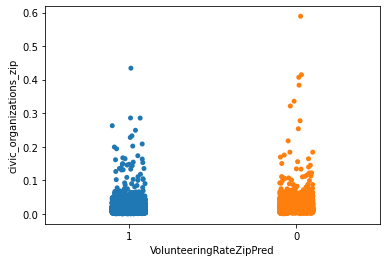

In [15]:
contingency = pd.crosstab(socCap_df["VolunteeringRateZipPred"], socCap_df["civic_organizations_zip"])
print(contingency)

# Building a chi-sq test

chisq, pval, dof, expected = st.chi2_contingency(contingency)
print(chisq, pval, dof, expected)

g = sns.stripplot(data = socCap_df, x = "VolunteeringRateZipPred", y = "civic_organizations_zip")

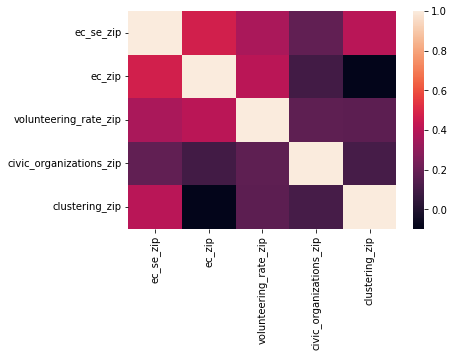

In [5]:
# Heatmap to test correlation between data points

listCol = ["ec_se_zip", "ec_zip", "volunteering_rate_zip", "civic_organizations_zip", "clustering_zip"]
heatmap = sns.heatmap(socCap_df[listCol].corr())

# Part 5 - Geoencoding ( Could not Finish ) 


In [1]:
# Geoencoding 

# geo_df = socCap_df.copy()
# geo_df['zip'] = geo_df.index
 
# peers = geo_df.groupby('cluster')['zip'].count().reset_index()
# peers.rename(columns = {"zip": "peers"}, inplace = True)

# geo_df = pd.merge(geo_df, peers, on = 'cluster')
# geo_df = gpd.GeoDataFrame(geo_df)

# geo_df.explore("cluster", tooltip=["zip", "volunteering_rate_zip", "cluster", "peers"], categorical = True)